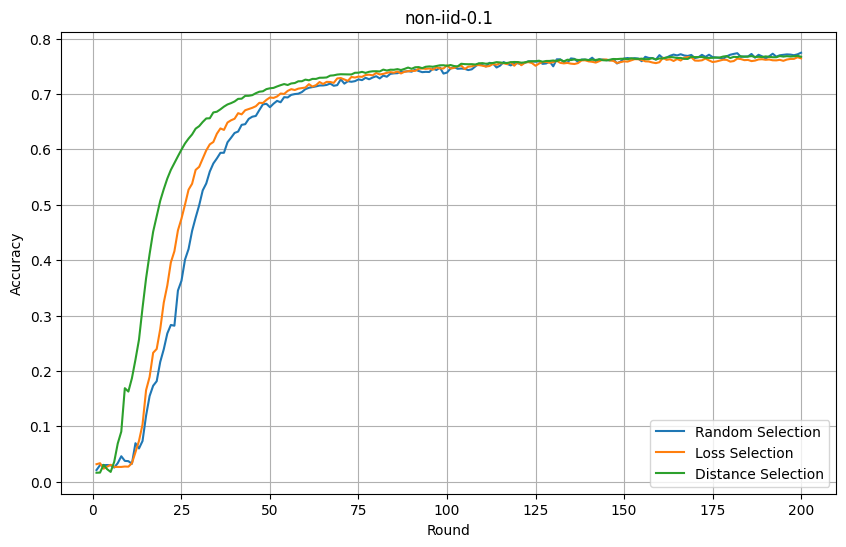

In [6]:
import matplotlib.pyplot as plt

# File path
# file_path = "./iid_accuracy.txt"
# file_path = "./non-iid-0.9_accuracy.txt"
# file_path = "./non-iid-0.5_accuracy.txt"
file_path = "./non-iid-0.1_accuracy.txt"

# Initialize dictionaries to store accuracy values
accuracy_data = {
    "random_selection": [],
    "loss_selection": [],
    "distance_selection": []
}

# Read and parse the data
with open(file_path, "r") as file:
    for line in file:
        if line.startswith("random_selection:"):
            accuracy = float(line.split(":")[1].strip())
            accuracy_data["random_selection"].append(accuracy)
        elif line.startswith("loss_selection:"):
            accuracy = float(line.split(":")[1].strip())
            accuracy_data["loss_selection"].append(accuracy)
        elif line.startswith("distance_selection:"):
            accuracy = float(line.split(":")[1].strip())
            accuracy_data["distance_selection"].append(accuracy)

# Generate rounds (x-axis)
rounds = list(range(1, len(accuracy_data["random_selection"]) + 1))

# Plot the data
plt.figure(figsize=(10, 6))
# plt.plot(rounds, accuracy_data["random_selection"], label="Random Selection", marker='o')
# plt.plot(rounds, accuracy_data["loss_selection"], label="Loss Selection", marker='x')
# plt.plot(rounds, accuracy_data["distance_selection"], label="Distance Selection", marker='s')

plt.plot(rounds, accuracy_data["random_selection"], label="Random Selection")
plt.plot(rounds, accuracy_data["loss_selection"], label="Loss Selection")
plt.plot(rounds, accuracy_data["distance_selection"], label="Distance Selection")

# Add labels and title
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.title("non-iid-0.1")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()